In [1]:
import pandas as pd
import numpy as np

# get overview of the data
salary_data = pd.read_csv('salary.csv')
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [2]:
# simplify column names
salary_data.columns = ['experience', 'salary']

In [3]:
# check for null values
salary_data.isnull().sum()

experience    0
salary        0
dtype: int64

In [4]:
salary_data.head()

,experience,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
salary_data.describe()

,experience,salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


<AxesSubplot:xlabel='experience', ylabel='salary'>

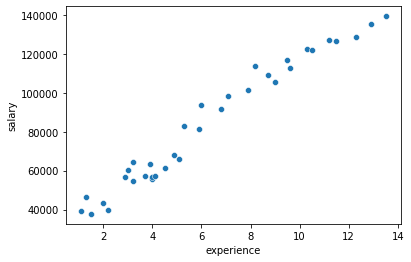

In [6]:
import seaborn as sns

# plot correlation between years of experience and salary
sns.scatterplot(x=salary_data['experience'], y=salary_data['salary'])

<AxesSubplot:>

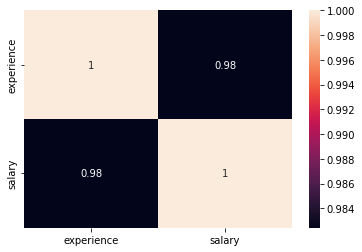

In [7]:
# heat map of correlation
sns.heatmap(salary_data.corr(),annot=True)

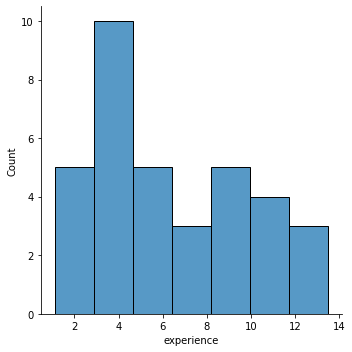

In [8]:
# plot distribution of years
sns.displot(salary_data['experience'])

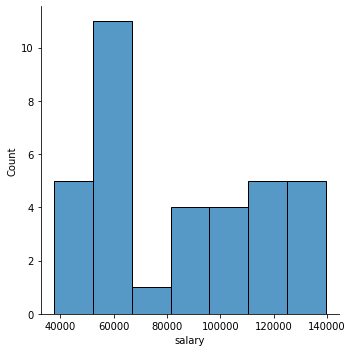

In [9]:
# plot distribution of salary
sns.displot(salary_data['salary'])

<AxesSubplot:xlabel='experience', ylabel='count'>

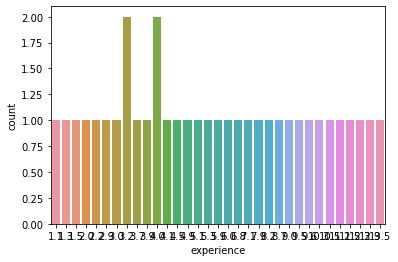

In [10]:
sns.countplot(x='experience', data=salary_data)

<AxesSubplot:xlabel='experience', ylabel='salary'>

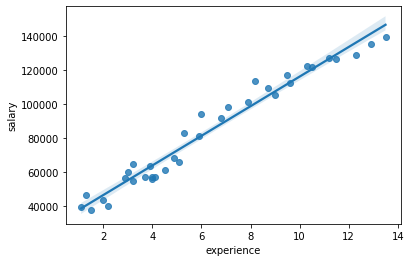

In [11]:
sns.regplot(x='experience', y='salary', data=salary_data)

In [12]:
# split data into their corresponding variables
# independent variable
X = salary_data.iloc[:, :-1].values 
# dependent variable
y = salary_data.iloc[:, -1].values  

In [13]:
from sklearn.model_selection import train_test_split

# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


# fit the model using the training data
model.fit(X_train, y_train)

# make predictions...
predictions = model.predict(X_test)
predictions

array([120197.8256403 ,  88644.21802942,  74146.61453254, 118492.2252289 ,
        98025.02029212,  72441.01412114,  63913.01206415,  43445.80712736,
        64765.81226984, 112522.623789  , 107405.82255481])

In [15]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)

21950965.82414734

In [16]:
from sklearn.metrics import r2_score

# 1 means that the model is perfect
# 0 means that the model will perform badly
r2_score(y_test, predictions)

0.9714499470616078

In [17]:
import pickle

# serialize model to use in application
with open("salary_prediction.pkl", "wb") as f:
    pickle.dump(model, f)